In [1]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np

## series 类型说明
这个就是一种类似一维数组的对象，它是由一组数据以及一组与之相关的数组标签组成。

In [2]:
obj  = Series([1,2,3,4,5])
print(obj)
print(obj.values)
print(obj.index)

0    1
1    2
2    3
3    4
4    5
dtype: int64
[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


In [6]:
# 自定义索引
obj = Series(['a','b','c','d','e'], index=[1,2,3,4,5])
print(obj)

1    a
2    b
3    c
4    d
5    e
dtype: object


In [7]:
obj[1]

'a'

In [3]:
# 也可以把series当做字典来使用
data = {'a':1000, 'b':2000, 'c':3000}
obj = Series(data)
print(obj)

keys = ['a', 'c']
obj_1 = Series(data, index=keys)
print(obj_1)

a    1000
b    2000
c    3000
dtype: int64
a    1000
c    3000
dtype: int64


In [4]:
# 确实数据的处理
data = {'a':None, 'b':2000, 'c':3000}
obj = Series(data)
print(obj)

a       NaN
b    2000.0
c    3000.0
dtype: float64


In [5]:
pd.isnull(obj)

a     True
b    False
c    False
dtype: bool

In [6]:
pd.notnull(obj)

a    False
b     True
c     True
dtype: bool

In [7]:
obj.isnull()

a     True
b    False
c    False
dtype: bool

In [8]:
obj.notnull()

a    False
b     True
c     True
dtype: bool

In [9]:
data = {'LiLei':None, 'HanMeiMei':25, 'Tony':None, 'Jack':50}
obj = Series(data)
obj.name = 'NameAndAge'
obj.index.name = 'Xingming'
print(obj)

Xingming
LiLei         NaN
HanMeiMei    25.0
Tony          NaN
Jack         50.0
Name: NameAndAge, dtype: float64


## DataFrame类型
### DataFrame是一个表格类型的数据结构，它含有一组有序的列。每列可以是不同值的类型、数值、字符串、布尔值都可以
### DataFrame本身有行索引也有列索引
### DataFrame也可以理解成是由Series组成的一个字典

In [11]:
# 构建一个DataFrame
data = {
    '60年代':['狗子','嘎子','秀儿'],
    '70年代':['卫国','建国','爱国'],
    '80年代':['李雷','韩梅梅','张伟']
}
frame_data = DataFrame(data)
print(frame_data)
print(frame_data['70年代'])

60年代 70年代 80年代
0   狗子   卫国   李雷
1   嘎子   建国  韩梅梅
2   秀儿   爱国   张伟
0    卫国
1    建国
2    爱国
Name: 70年代, dtype: object


In [12]:
import numpy as np
dates = pd.date_range('20190301', periods=6)
print(dates)

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06'],
              dtype='datetime64[ns]', freq='D')


In [13]:
df  = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('ABCD'))
print(df)

A         B         C         D
2019-03-01  0.361735  0.232359  0.097910  0.574862
2019-03-02  0.279337  0.122476  0.899845  0.698584
2019-03-03  0.499549  0.729956  0.592091  0.927548
2019-03-04  0.728572  0.505570  0.826012  0.730521
2019-03-05  0.650669  0.475762  0.558813  0.727083
2019-03-06  0.234177  0.100347  0.209138  0.551375


In [14]:
df.T

,2019-03-01 00:00:00,2019-03-02 00:00:00,2019-03-03 00:00:00,2019-03-04 00:00:00,2019-03-05 00:00:00,2019-03-06 00:00:00
A,0.361735,0.279337,0.499549,0.728572,0.650669,0.234177
B,0.232359,0.122476,0.729956,0.505570,0.475762,0.100347
C,0.097910,0.899845,0.592091,0.826012,0.558813,0.209138
D,0.574862,0.698584,0.927548,0.730521,0.727083,0.551375


In [15]:
df['20190301':'20190303']

,A,B,C,D
2019-03-01,0.361735,0.232359,0.097910,0.574862
2019-03-02,0.279337,0.122476,0.899845,0.698584
2019-03-03,0.499549,0.729956,0.592091,0.927548


In [16]:
df.loc['20190301':'20190303',['A','B']] #对行和列同时进行筛选

,A,B
2019-03-01,0.361735,0.232359
2019-03-02,0.279337,0.122476
2019-03-03,0.499549,0.729956


In [17]:
df.at[dates[0],'A']

0.36173482262921464

In [18]:
df.head(2)

,A,B,C,D
2019-03-01,0.361735,0.232359,0.097910,0.574862
2019-03-02,0.279337,0.122476,0.899845,0.698584


In [19]:
df.tail(2)

,A,B,C,D
2019-03-05,0.650669,0.475762,0.558813,0.727083
2019-03-06,0.234177,0.100347,0.209138,0.551375


#### DataFrame构造函数能够接收哪些数据类型
1.  二维numpy array
2. 有数组、列表或者是元组组成的字典
3. 有Series组成的字典
4. 由字典组成的字典
5. 字典或Series租的列表
6. 由列表或元组组成的列表
7. 另一个DataFrame

## pandas重新索引

In [6]:
obj = Series([4.5,9.8,-1.2], index= ['a','b','c'])
print(obj)
job_1 = obj.reindex(['a','b','c','e','f'])
print(job_1)

a    4.5
b    9.8
c   -1.2
dtype: float64
a    4.5
b    9.8
c   -1.2
e    NaN
f    NaN
dtype: float64


In [7]:
obj.reindex(['a','b','c','e','f'], fill_value=0)

a    4.5
b    9.8
c   -1.2
e    0.0
f    0.0
dtype: float64

In [2]:
obj = Series([4.5,9.8,-1.2], index=[0,2,4])
o = obj.reindex(range(6), method='ffill') #向前值填充 bfill后向填充
print(obj)
print(o)

0    4.5
2    9.8
4   -1.2
dtype: float64
0    4.5
1    4.5
2    9.8
3    9.8
4   -1.2
5   -1.2
dtype: float64


### 算术运算和数据对齐
pandas对不同的对象进行算数运算，在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引的并集

In [4]:
d1 = Series([1.3,1.5,2.6,-3.5],index=['a','b','c','d'])
d2 = Series([-1.3,-1.5,-2.6,3.9,9.8],index=['a','b','c','d','e'])
d1 + d2

a    0.0
b    0.0
c    0.0
d    0.4
e    NaN
dtype: float64

In [9]:
df1 = DataFrame(np.arange(9).reshape((3,3)), columns=list('abc'), index=[1,2,3])
df1

,a,b,c
1,0,1,2
2,3,4,5
3,6,7,8


In [10]:
df2 = DataFrame(np.arange(12).reshape((4,3)), columns=list('cde'), index=[1,2,3,4])
df2

,c,d,e
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


In [11]:
df1 + df2

,a,b,c,d,e
1,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,8.0,NaN,NaN
3,NaN,NaN,14.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [12]:
df1.add(df2, fill_value=0)  #用0来填充不重叠的值。注意：如果本身位置为空，那么还是空

,a,b,c,d,e
1,0.0,1.0,2.0,1.0,2.0
2,3.0,4.0,8.0,4.0,5.0
3,6.0,7.0,14.0,7.0,8.0
4,NaN,NaN,9.0,10.0,11.0


### DataFrame和series之间的运算

In [19]:
frame = DataFrame(np.arange(12).reshape((4,3)), columns=list('bde'), index=[1,2,3,4])
series = frame.loc[1]
print(frame)
print(series)

b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
d    1
e    2
Name: 1, dtype: int64


In [20]:
frame - series #一直向下广播相减

,b,d,e
1,0,0,0
2,3,3,3
3,6,6,6
4,9,9,9


In [21]:
series = Series(range(3), index=list('bef'))
print(frame)
print(series)
frame + series  #相加时，没有就合并

b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
e    1
f    2
dtype: int64


,b,d,e,f
1,0.0,NaN,3.0,NaN
2,3.0,NaN,6.0,NaN
3,6.0,NaN,9.0,NaN
4,9.0,NaN,12.0,NaN


## 排序

In [22]:
obj = Series(range(4), index=['d','e','a','b'])
print(obj)

d    0
e    1
a    2
b    3
dtype: int64


In [23]:
obj.sort_index()

a    2
b    3
d    0
e    1
dtype: int64

In [24]:
obj.sort_values()

d    0
e    1
a    2
b    3
dtype: int64

### 针对DataFrame，根据任意一个轴上的索引进行排序

In [27]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['two','one'], columns=['c','d','a','b'])
frame

,c,d,a,b
two,0,1,2,3
one,4,5,6,7


In [28]:
frame.sort_index()

,c,d,a,b
one,4,5,6,7
two,0,1,2,3


In [29]:
frame.sort_index(axis=1) #指定轴来进行排序

,a,b,c,d
two,2,3,0,1
one,6,7,4,5


In [30]:
frame = DataFrame({'b':[4,7,2,-1],'a':[0,4,2,0]})
frame

,b,a
0,4,0
1,7,4
2,2,2
3,-1,0


In [31]:
frame.sort_values(by='b')

,b,a
3,-1,0
2,2,2
0,4,0
1,7,4


### 层次化索引
层次化索引是pandas的一项比较重要的功底，它能够在一个轴上拥有多个索引级别。另一种说法是能以低纬度形式处理高纬度数据。

In [5]:
data = Series(np.random.randn(10), index=[['a','a','a','b','b','b','c','c','d','d'],
                                            [1,2,3,4,5,6,7,8,1,2]])
data

a  1    1.303764
   2   -1.150121
   3   -3.115592
b  4   -1.774861
   5    0.091127
   6    0.084871
c  7   -1.037826
   8   -1.396992
d  1    0.634809
   2   -1.556455
dtype: float64

In [6]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 4),
            ('b', 5),
            ('b', 6),
            ('c', 7),
            ('c', 8),
            ('d', 1),
            ('d', 2)],
           )

In [9]:
#选子集操作
data.loc['a']

1    1.303764
2   -1.150121
3   -3.115592
dtype: float64

In [10]:
data['b':'c']

b  4   -1.774861
   5    0.091127
   6    0.084871
c  7   -1.037826
   8   -1.396992
dtype: float64

In [11]:
#内层选取
data[:,2]

a   -1.150121
d   -1.556455
dtype: float64

In [12]:
data.unstack() #生成新的DataFrame

,1,2,3,4,5,6,7,8
a,1.303764,-1.150121,-3.115592,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,-1.774861,0.091127,0.084871,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,-1.037826,-1.396992
d,0.634809,-1.556455,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.unstack().stack()

a  1    1.303764
   2   -1.150121
   3   -3.115592
b  4   -1.774861
   5    0.091127
   6    0.084871
c  7   -1.037826
   8   -1.396992
d  1    0.634809
   2   -1.556455
dtype: float64

### 对于DataFrame，每轴都可以有分层索引，各层也可以有名字

In [14]:
frame_data = DataFrame(np.arange(12).reshape((4,3)),
                        index=[['a','a','b','b'],[1,2,3,4]],
                        columns=[['black','yellow','blue'],['green','red','green']])
frame_data

black yellow  blue
    green    red green
a 1     0      1     2
  2     3      4     5
b 3     6      7     8
  4     9     10    11

In [17]:
frame_data.index.names=['key1','key2']
frame_data

black yellow  blue
          green    red green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    3        6      7     8
     4        9     10    11

In [19]:
frame_data.columns.names=['color1','color2']
frame_data

color1    black yellow  blue
color2    green    red green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    3        6      7     8
     4        9     10    11

In [23]:
frame_data = DataFrame(np.arange(12).reshape((4,3)),
                        index=[['a','a','b','b'],[1,2,3,4]],
                        columns=[['black','yellow','black'],['green','red','green']])
frame_data.index.names=['key1','key2']
frame_data

black yellow black
          green    red green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    3        6      7     8
     4        9     10    11

In [21]:
#DataFrame类型层次化索引的访问
frame_data['black'] #怼列进行筛选

green  green
a 1      0      2
  2      3      5
b 3      6      8
  4      9     11

In [22]:
frame_data.loc['a', ['black']]

black      
  green green
1     0     2
2     3     5

In [25]:
frame_data

black yellow black
          green    red green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    3        6      7     8
     4        9     10    11

In [26]:
# 根据级别汇总统计
frame_data.sum(level='key2')

,black,yellow,black
,green,red,green
key2,,,
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


In [2]:
frame_data = DataFrame(np.arange(12).reshape((4,3)),
                        index=[['a','a','b','b'],[1,2,3,4]],
                        columns=[['black','yellow','black'],['green','red','green']])
frame_data

black yellow black
    green    red green
a 1     0      1     2
  2     3      4     5
b 3     6      7     8
  4     9     10    11

In [3]:
frame_data['black']

green  green
a 1      0      2
  2      3      5
b 3      6      8
  4      9     11

In [4]:
# 行列同时进行访问筛选
frame_data.loc['a',['black']]

black      
  green green
1     0     2
2     3     5

In [7]:
frame_data.index.names=['key1','key2']
frame_data

black yellow black
          green    red green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    3        6      7     8
     4        9     10    11

In [8]:
#计算
frame_data.sum(level='key2')

,black,yellow,black
,green,red,green
key2,,,
1,0,1,2
2,3,4,5
3,6,7,8
4,9,10,11


## pandas文本格式数据处理


In [9]:
cat files/data2.csv

a,b,c,d,message,data
1,2,3,4,5,NA
hello,6,7,8,9,world
NA,10,11,12,14

In [10]:
pd.read_csv('files/data2.csv') #文中的NA代表的就是空

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world
2,NaN,10,11,12,14,NaN


In [12]:
pd.read_csv('files/data2.csv',skiprows=[1]) #不读取哪一行

,a,b,c,d,message,data
0,hello,6,7,8,9,world
1,NaN,10,11,12,14,NaN


In [13]:
data = pd.read_csv('files/data2.csv')
pd.isnull(data)

,a,b,c,d,message,data
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,True,False,False,False,False,True


In [16]:
# 指定读取，大文件下使用
data = pd.read_csv('files/data2.csv', nrows=2)
data

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world


In [17]:
data = pd.read_csv('files/data2.csv')
data.to_csv('files/data3.csv', sep='|')

In [28]:
## 读取Excel数据
excel = pd.read_excel('files/data_excel.xlsx')
excel

,id,age,place
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


In [30]:
pd.read_excel('files/data_excel.xlsx', sheet_name='Sheet1')

,id,age,place
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


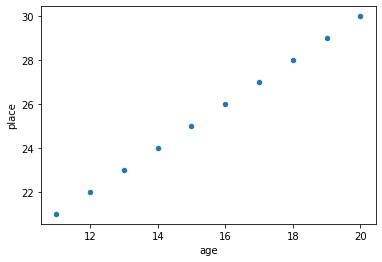

In [34]:
pd.read_excel('files/data_excel.xlsx', sheet_name='Sheet2')
pl = excel.plot(kind='scatter', x='age', y='place').get_figure()
pl.savefig('files/1.png')

In [35]:
import numpy as np
dates = pd.date_range('20200101',periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

A         B         C         D
2020-01-01  0.378186 -0.171100 -0.999931  0.452208
2020-01-02 -0.482631  0.936822  1.368803  0.113857
2020-01-03 -1.586037 -1.302700  0.185139  0.698571
2020-01-04  1.044705 -1.235231  0.835159  0.892462
2020-01-05  2.736904  2.051666 -0.077775  1.869665
2020-01-06  0.635695  0.659630  0.560543 -0.022046


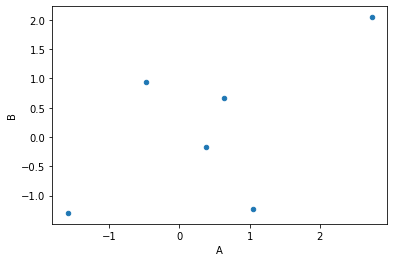

In [36]:
pl = df.plot(kind='scatter',x='A',y='B').get_figure()